In [5]:
# ===============================================
# DECISION TREE CLASSIFICATION - HEART DISEASE
# ===============================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\Decision Tree\\Decision Tree\\heart_disease.csv")

print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())

Dataset Shape: (908, 13)
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  

Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


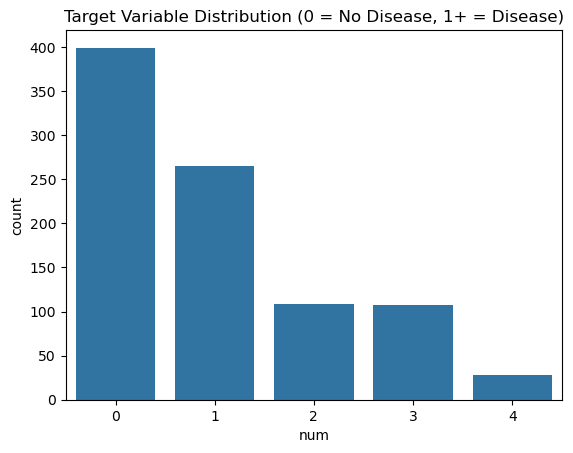

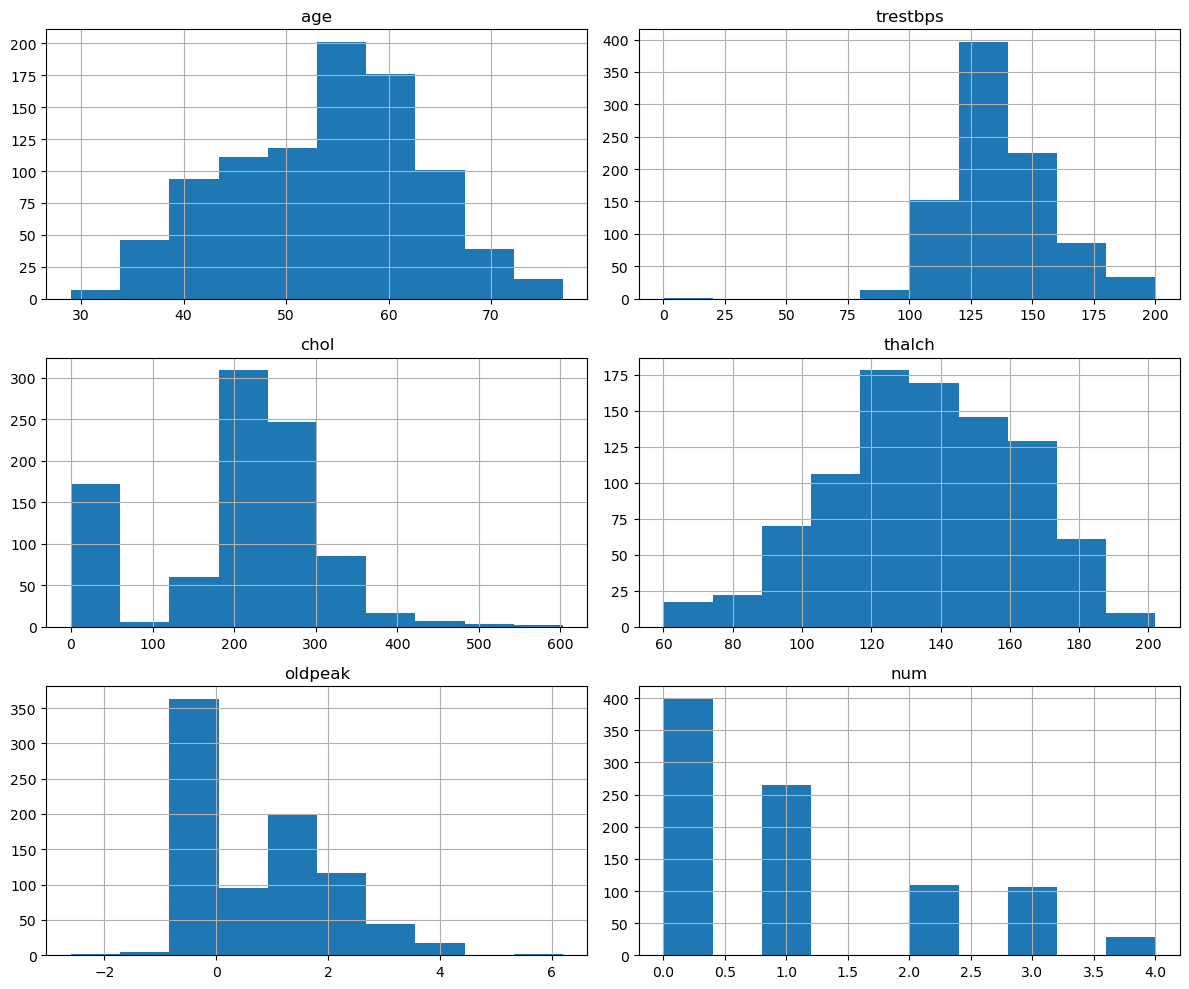

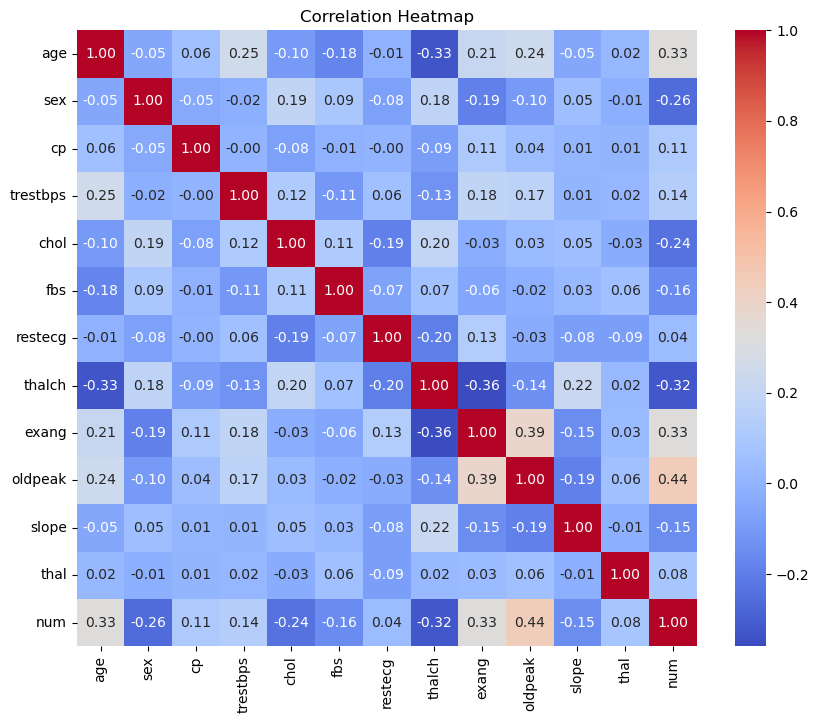

In [7]:
# -------------------------------
# 3. Exploratory Data Analysis (EDA)
# -------------------------------
print("Missing Values:\n", df.isnull().sum())

# Target variable distribution
sns.countplot(x=df['num'])
plt.title("Target Variable Distribution (0 = No Disease, 1+ = Disease)")
plt.show()

# Histograms of all features
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Correlation heatmap (convert categorical to numeric first for correlation)
df_numeric = df.copy()
for col in df_numeric.select_dtypes(include=['object', 'bool']).columns:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# -------------------------------
# 4. Feature Engineering
# -------------------------------

# Handle missing values in oldpeak (replace with median)
df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)

# Convert target into binary classification (0 = No disease, 1 = Disease)
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

print("Target distribution after binarization:\n", df["num"].value_counts())

# Encode categorical variables using Label Encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object','bool']).columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

print("\nSample after encoding:\n", df_encoded.head())

# Separate features (X) and target (y)
X = df_encoded.drop("num", axis=1)
y = df_encoded["num"]

print("\nFeature set shape:", X.shape)
print("Target shape:", y.shape)


Target distribution after binarization:
 num
1    509
0    399
Name: count, dtype: int64

Sample after encoding:
    age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    0   0       145   233    0        0     150      0      2.3      0   
1   41    0   1       135   203    1        1     132      0      0.0      1   
2   57    0   2       140   192    1        1     148      0      0.4      1   
3   52    0   0       118   186    1        0     190      0      0.0      1   
4   57    0   2       110   201    1        1     126      1      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  

Feature set shape: (908, 12)
Target shape: (908,)


C:\Users\Sindu\AppData\Local\Temp\ipykernel_19124\2350455265.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)


In [41]:
# -------------------------------
# 5. Decision Tree Model
# -------------------------------

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Train model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Show first few predictions
print("Sample Predictions:", y_pred[:10])
print("Sample Actual    :", list(y_test[:10]))


Sample Predictions: [1 1 1 1 0 0 0 1 0 1]
Sample Actual    : [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]



--- Decision Tree Performance ---
Accuracy : 0.7087912087912088
Precision: 0.7525773195876289
Recall   : 0.7156862745098039
F1-Score : 0.7336683417085427

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68        80
           1       0.75      0.72      0.73       102

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



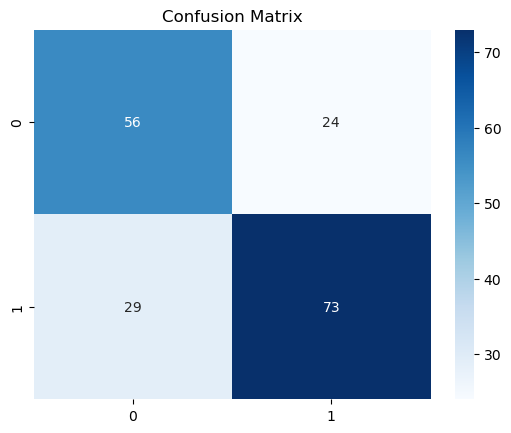

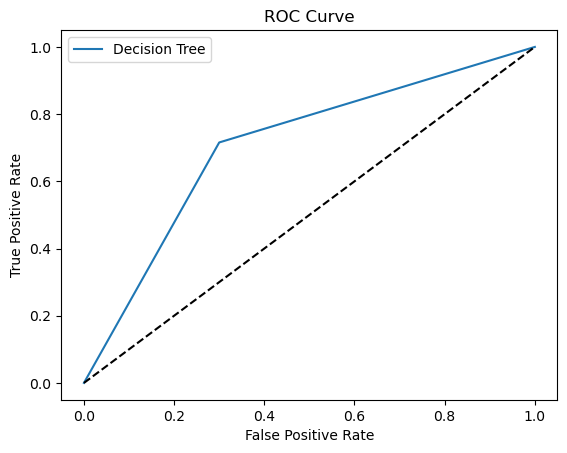

ROC-AUC Score: 0.7078431372549019


In [43]:
# -------------------------------
# 6. Model Evaluation
# -------------------------------
print("\n--- Decision Tree Performance ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


In [45]:
# -------------------------------
# 7. Hyperparameter Tuning
# -------------------------------
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate tuned model
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7837128011336798

Tuned Model Accuracy: 0.7417582417582418
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        80
           1       0.76      0.78      0.77       102

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



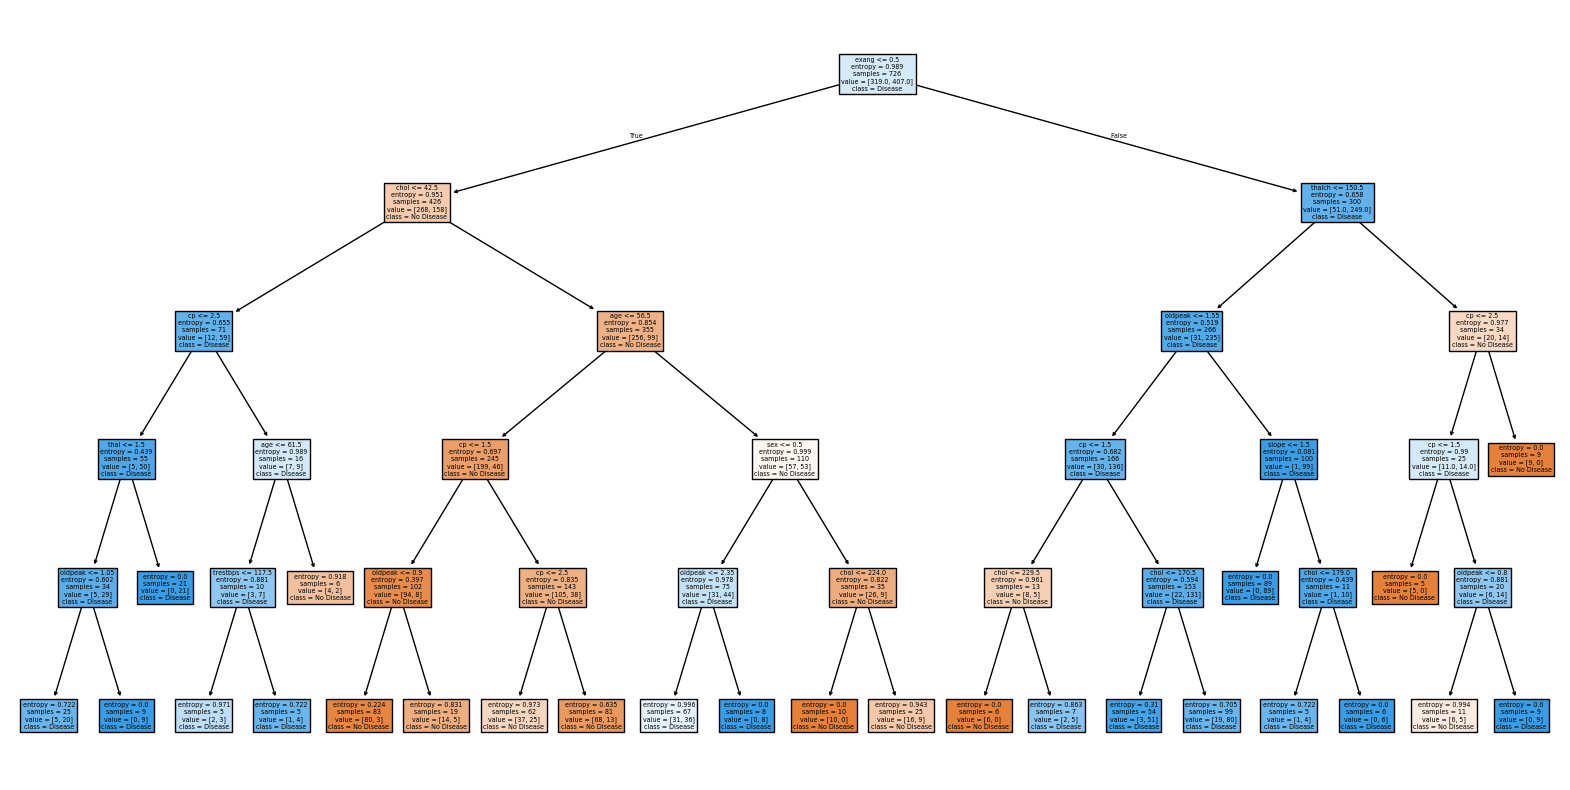

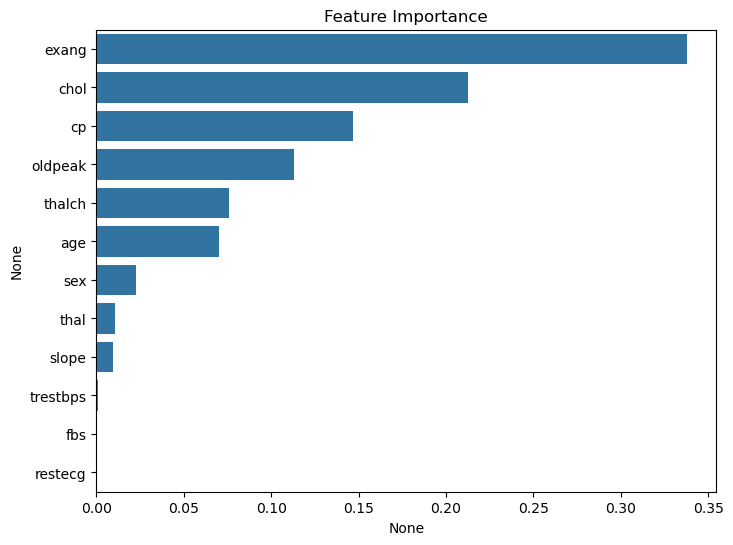

In [47]:
# -------------------------------
# 8. Visualize Decision Tree
# -------------------------------
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()

# Feature Importance
feat_importance = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance")
plt.show()